# Standard imports

In [207]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Boston Dataset

## Exploratory Data Analysis

### Storing and reading the data

In [208]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [209]:
boston_data = pd.read_csv('boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [210]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [211]:
boston_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [212]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [213]:
boston_data = boston_data.drop('CHAS', axis=1)
boston_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Representing initial data

KeyError: 'CHAS'

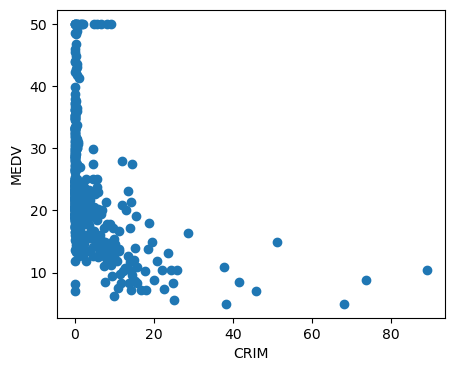

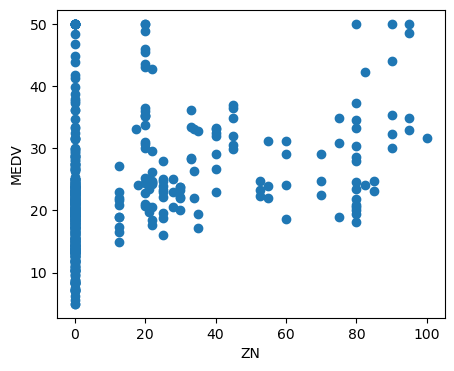

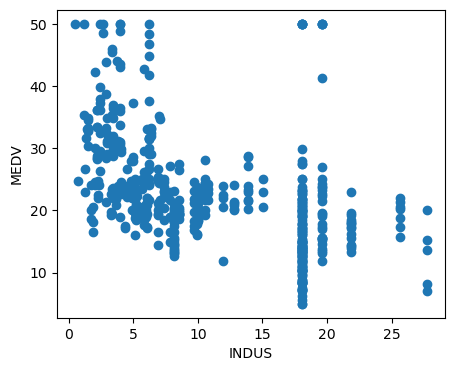

<Figure size 500x400 with 0 Axes>

In [214]:
for feature in column_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(boston_data[feature], boston_data['MEDV']);
    plt.ylabel('MEDV');
    plt.xlabel(feature);
plt.show();

### Separating the data into two separate tables to show the target column

In [ ]:
X_boston = boston_data.drop('MEDV', axis=1)
y_boston = boston_data['MEDV']

## Preprocessing

In [ ]:
X_boston = StandardScaler().fit_transform(X_boston)

In [ ]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_boston)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_boston)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

0.7431012099832174


### Testing and Training the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_boston, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (404, 4)
Testing  Shape:  (102, 4)


## Performing Linear Regression

### Model fitting and predictions

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.6435608241837448
Testing R^2 Score: 0.6637343107993485


### Data representation

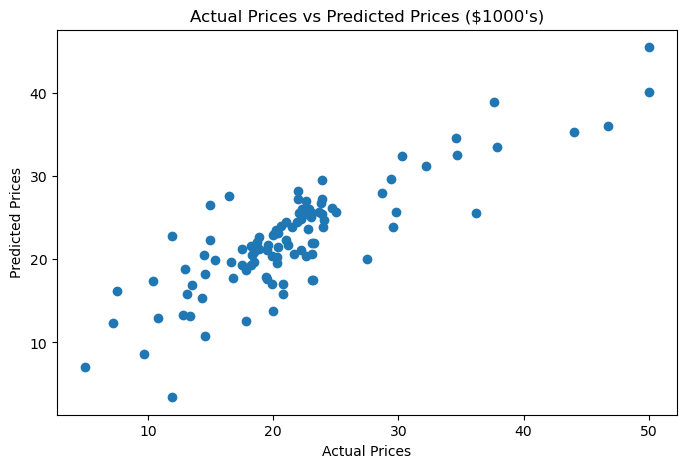

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
plt.show()

Text(0, 0.5, 'MEDV')

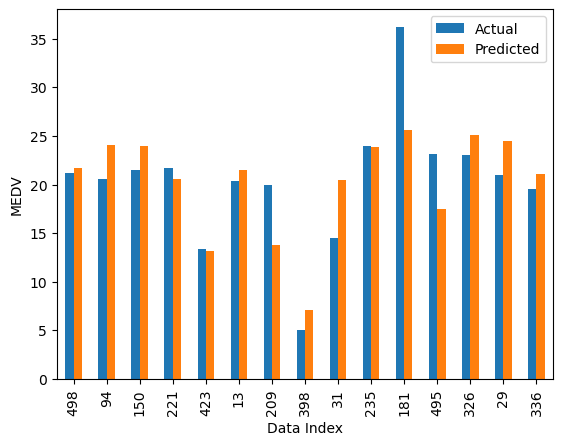

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Calculating Mean Squared Error and Root Mean Squared Error

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  21.657338772645573
Root Mean Squared Error:  4.6537445968430164


## Performing Random Forest

### Model fitting and predictions

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

### Data representation

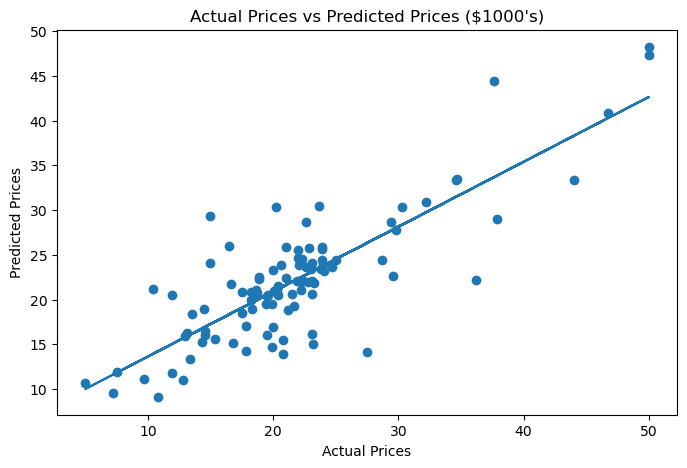

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

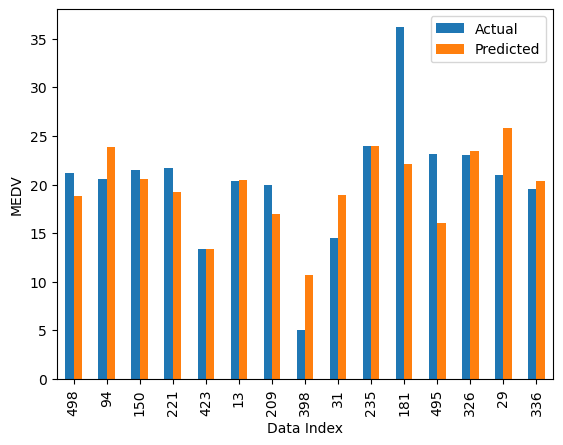

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Calculating Mean Squared Error and Root Mean Squared Error

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  18.825239676470584
Root Mean Squared Error:  4.338806250164967


We observed a lower RMSE using Random Forest Regressor

## Performing Gradient Boost

### Model fitting and predictions

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

### Data representation

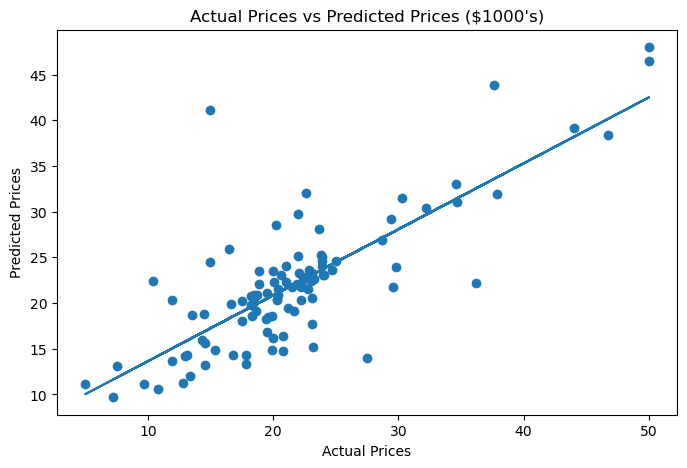

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices ($1000's)")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'MEDV')

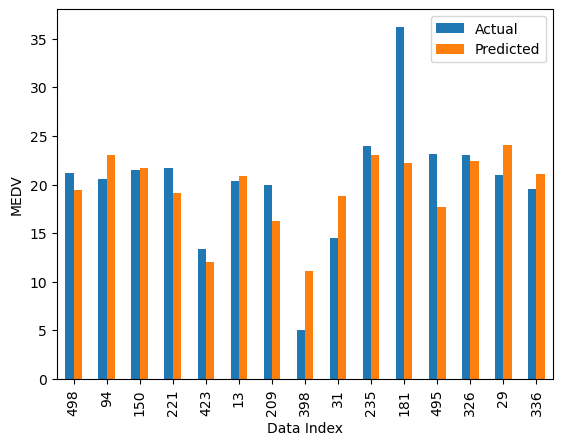

In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("MEDV")

### Calculating Mean Squared Error and Root Mean Squared Error

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  18.192751294568087
Root Mean Squared Error:  4.265296155552166


We observed an even lower RMSE using Gradient Boost

# Miami Dataset

In [ ]:
miami_data = pd.read_csv('/content/sample_data/miami-housing.csv')
miami_data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_miami, y_miami)

predictions_miami = model.predict(X_miami)